In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [4]:
# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extrac

In [5]:
import numpy as np

# Isolate the 'digits' data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with 'target'
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))
print(number_digits)

# Isolate the 'images'
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 64)
(1797,)
10
(1797, 8, 8)


In [6]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 0, str(digits.target[i]))

# Show the plot
plt.show()

<Figure size 600x600 with 64 Axes>

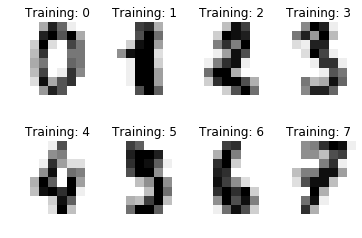

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [9]:
from sklearn.decomposition import PCA

# Create a Randomized PCA model that takes two components
#randomized_pca = PCA(n_components=2, svd_solver='randomized')

# Fit and transform the data to the model
#reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
print(reduced_data_pca.shape)

# Print out the data
#print(reduced_data_rpca)
print(reduced_data_pca)

(1797, 2)
[[ -1.25946699  21.27488226]
 [  7.95760587 -20.76869525]
 [  6.99192569  -9.95598777]
 ...
 [ 10.80128746  -6.96025833]
 [ -4.87209913  12.42396067]
 [ -0.34438103   6.36554285]]


In [10]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

NameError: name 'reduced_data_rpca' is not defined

In [11]:
# Import
from sklearn.preprocessing import scale

# Apply `scale()` to the `digits` data
data = scale(digits.data)

print(data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [12]:
# Import `train_test_split`
from sklearn.model_selection  import train_test_split

# Split the `digits` data into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

In [13]:
# Number of training features
n_samples, n_features = X_train.shape

# Print out `n_samples`
print(n_samples)

# Print out `n_features`
print(n_features)

# Number of Training labels
n_digits = len(np.unique(y_train))

# Inspect `y_train`
print(len(y_train))

1347
64
1347


In [14]:
# Import the `cluster` module
from sklearn import cluster

# Create the KMeans model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

# Fit the training data to the model
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

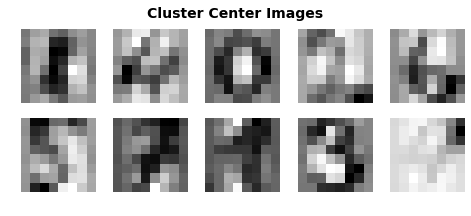

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size in inches
fig = plt.figure(figsize=(8, 3))

# Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

# For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

# Show the plot
plt.show()

In [16]:
# Predict the labels for `X_test`
y_pred=clf.predict(X_test)

# Print out the first 100 instances of `y_pred`
print(y_pred[:100])

# Print out the first 100 instances of `y_test`
print(y_test[:100])

# Study the shape of the cluster centers
print(clf.cluster_centers_.shape)

[4 8 8 9 3 3 5 8 5 3 0 7 1 2 1 3 8 6 8 8 1 5 8 6 5 4 8 5 4 8 1 8 3 1 1 4 8
 1 6 4 4 8 0 8 4 7 8 2 4 5 5 0 8 5 4 2 8 2 2 7 2 1 5 3 1 5 6 2 6 8 8 8 8 6
 6 2 1 5 8 8 8 2 3 8 8 2 4 1 1 8 0 3 7 8 8 3 8 2 1 1]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4]
(10, 64)


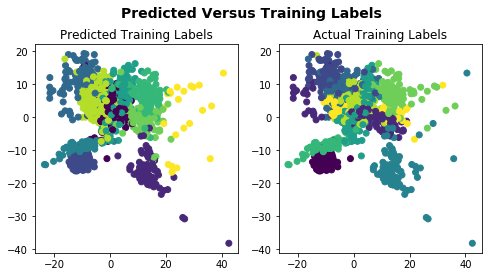

In [17]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

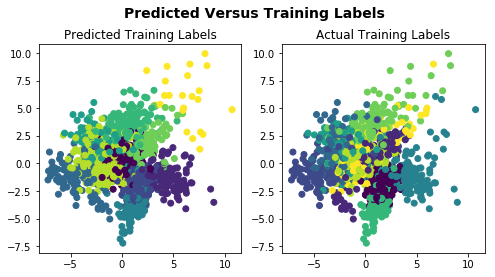

In [18]:
# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

In [19]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


In [20]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mu tual_info_score(y_test, y_pred),
      silhouette_score(X_test, y_pred, metric='euclidean')))

SyntaxError: invalid syntax (<ipython-input-20-7097f86646cc>, line 9)

In [26]:
# Import `train_test_split`
from sklearn.model_selection import train_test_split

# Split the data into training and test sets 
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Import the `svm` model
from sklearn import svm

# Create the SVC model 
svc_model = svm.SVC(gamma=0.001, C=100., kernel='linear')

# Fit the data to the SVC model
svc_model.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Import GridSearchCV
from sklearn.model_selection  import GridSearchCV

# Set the parameter candidates
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on training data
clf.fit(X_train, y_train)

# Print out the results 
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

c:\users\ryanlhu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best score for training data: 0.985894580549369
Best `C`: 1
Best kernel: rbf
Best `gamma`: 0.001


In [28]:
# Apply the classifier to the test data, and view the accuracy score
clf.score(X_test, y_test)  

# Train and score a new classifier with the grid search parameters
svm.SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train, y_train).score(X_test, y_test)

0.9911111111111112

In [29]:
# Predict the label of `X_test`
print(svc_model.predict(X_test[:10]))

# Print `y_test` to check the results
print(y_test[:10])

[6 9 3 7 2 1 5 2 5 2]
[6 9 3 7 2 1 5 2 5 2]


In [23]:
# Import matplotlib
import matplotlib.pyplot as plt

# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

NameError: name 'svc_model' is not defined

In [30]:
# Import `metrics`
from sklearn import metrics

# Print the classification report of `y_test` and `predicted`
print(metrics.classification_report(y_test, predicted))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, predicted))

NameError: name 'predicted' is not defined

In [25]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
predicted = svc_model.predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust the layout
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=predicted)
ax[0].set_title('Predicted labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Labels')


# Add title
fig.suptitle('Predicted versus actual labels', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

NameError: name 'svc_model' is not defined